In [44]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import random
import csv
import pathlib
import time
import re
import pandas as pd
import os

In [45]:
def pdTableReader(fn):
    return pd.read_csv(fn, header=None,names=['PD','x1','y1','x2','y2','rotation','scale','size_x','size_y'])

def ccfReader(fn):
    return pd.read_csv(fn,encoding= "UTF 8" , header=None, names=['PD','CCF_LIST'])

def newListProcessor(pdTbl,ccf_data):
    new_list = []
    FRAME_COORD = []
    
    # New df not used.
    newdf = pd.DataFrame({'PD': pd.Series(dtype='str'),
                   'x1': pd.Series(dtype='float'),
                   'y1': pd.Series(dtype='float'),
                   'x2': pd.Series(dtype='float'),
                   'y2': pd.Series(dtype='float')})
    
    rx = re.compile("{(\S+)\s+(\S+)\s+\S+\s+\S+\s+\S+}+")
    for (row,val) in ccf_data.iterrows():
        primeDie = ccf_data['PD'][row]
        search_pd = pdTbl['PD'].str.contains(primeDie)
        if search_pd.any() == None:
            continue
        if primeDie == 'FRAME':
            FRAME_COORD = val[1]
            continue
        pd_x1 = pdTbl.loc[pdTbl['PD'] == primeDie, 'x1'].item()
        pd_y1 = pdTbl.loc[pdTbl['PD'] == primeDie, 'y1'].item()
        pd_x2 = pdTbl.loc[pdTbl['PD'] == primeDie, 'x2'].item()
        pd_y2 = pdTbl.loc[pdTbl['PD'] == primeDie, 'y2'].item()
        ccfl = ccf_data['CCF_LIST'][row]
        rx = re.compile("{(\S+)\s+(\S+)\s+\S+}+")
        coordl = re.findall(rx,ccfl)
        for x1,y1 in coordl:
            fx1 = float(x1) + pd_x1
            fy1 = float(y1) + pd_y1        
            fx2 = float(x1) + pd_x2
            fy2 = float(y1) + pd_y2
            new_list.append([primeDie,round(fx1,2),round(fy1,2),round(fx2,2),round(fy2,2)])

    FC = FRAME_COORD.split()
    FC = [float(x) for x in FC]
    FC.insert(0,'FRAME')
    new_list.append(FC)
    #new_df = pd.DataFrame(new_list,columns=('PD','x1','y1','x2','y2'))
    
    return new_list,FC
    

In [46]:
def draw_rectangle(frame,name,x1,y1,x2,y2):
    x3, y3 = x2, y1
    x4, y4 = x1, y2
    color  = ['lightblue','lightgreen','salmon','lavender','coral']
    ecolor = random.choice(color)
    
    if name =='FRAME':
        facecolor='white'
        ecolor = 'black'
        linewidth = 2
    else:
        linewidth = 1
        facecolor= 'None'

    rect = Rectangle((x1,y1), x2-x1, y2-y1,linewidth=linewidth, edgecolor=ecolor,facecolor=facecolor)
    frame.add_patch(rect)
    return rect

In [47]:
def add_text(frame,name,x1,y1,x2,y2):
    x_center = (x1 + x2) / 2
    y_center = (y1 + y2) / 2
    aspect_ratio = (x2 - x1) / (y2 - y1)
    rotation = 0 if aspect_ratio >= 1 else 90
    transform = frame.transData
    fontsize = 8
    fontdict = {'fontsize' : fontsize}
    fobj = frame.text(x_center,y_center,name,ha='center',va='center',
         rotation=rotation,transform=transform,bbox=None,fontdict=fontdict,color='salmon')
    #while fobj.get_window_extent(renderer=None).width > (x2 - x1) * 0.9 or fobj.get_window_extent(renderer=None).height > (y2 - y1) * 0.9:
    #    fontsize -= 1
    #    fontdict = {'fontsize' : fontsize}
    #    fobj.set_fontdict(fontdict)
    #    plt.draw()
    
    #bbox = dict(boxstyle='None',alpha=1.0)
    #frame.text(x_center,y_center,name,ha='center',va='center',rotation=rotation,transform=transform,bbox=None)
    return

In [48]:
def draw_figure(new_list,FC):
    plt.figure(figsize=(15,15))
    plt.autoscale(enable=False)
    plt.axis('scaled')
    frame = plt.gca()
    rect = draw_rectangle(frame,*FC)
    for plts in new_list:
        if plts[0] == "FRAME":
            continue
        draw_rectangle(frame,*plts)
        #add_text(frame,*plts)
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    frame.set_xlim(FC[1],FC[3])
    frame.set_ylim(FC[2],FC[4])
    plt.title('SITE CLUSTER SELECTION RESULT', fontsize=24)
    plt.autoscale(enable=True)
    plt.axis('scaled')
    image_out="cristest.png"
    plt.savefig(image_out,dpi=300, transparent=True)
    plt.show()
    return os.path.normpath(image_out)

In [49]:
def main():
    ccf_file = pathlib.Path(r'./photos_and_picture_frame.ccf')
    csv_file = pathlib.Path(r'./photo_picture_sizes.csv')
    pdTbl = pdTableReader(csv_file)
    ccf_data = ccfReader(ccf_file)
    new_list,FC = newListProcessor(pdTbl,ccf_data)
    new_img = draw_figure(new_list,FC)
    print(new_img)
    return


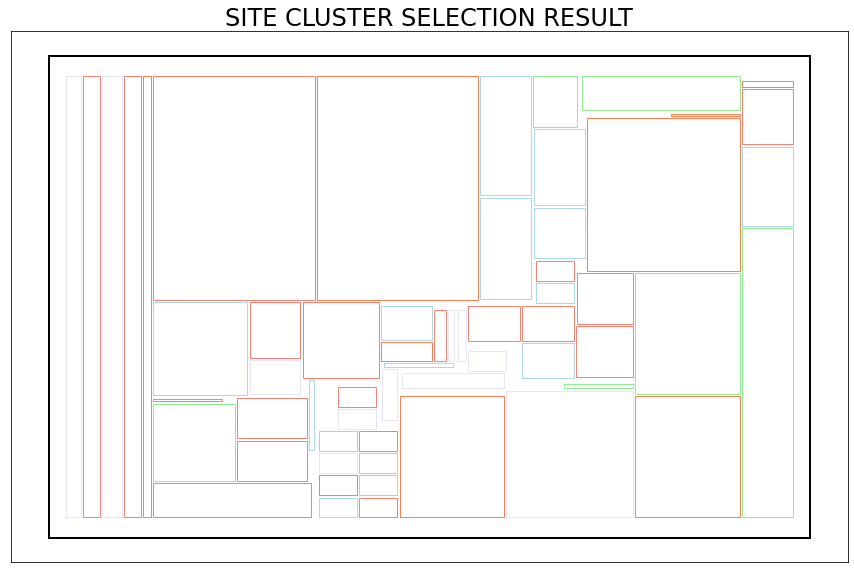

cristest.png


In [50]:
main()